# Курсовая работа

**Подключим необходимые библиотеки и установим некоторые переменные**

In [1211]:
# Основные библиотеки
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Разделение датасета
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score

# Модели
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

# Кластеризация
from sklearn.cluster import DBSCAN

# Метрики качества
from sklearn.metrics import r2_score as r2

import warnings
warnings.filterwarnings('ignore')

#%config InlineBackend.figure_format = 'svg'
# размер шрифта на графиках
matplotlib.rcParams.update({'font.size': 12})

**Определим пути к датасетам**

In [1212]:
TRAIN_DATASET = './data/train.csv'
TEST_DATASET = './data/test.csv'

**Загрузим наборы данных**

In [1213]:
train_df = pd.read_csv(TRAIN_DATASET, sep=',')
test_df = pd.read_csv(TEST_DATASET, sep=',')

Проверка корректности загрузки данные посредством чтения начала и окончания датасета

In [1214]:
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962


In [1215]:
train_df.tail()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
9995,1260,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,B,B,52,10311,6,NaN,1,9,B,119367.455796
9996,16265,27,2.0,64.307684,37.038420,9.0,13,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,199715.148807
9997,2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,B,B,20,4386,14,NaN,1,5,B,165953.912580
9998,14561,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,B,B,47,8004,3,125.0,3,5,B,171842.411855
9999,7202,94,1.0,35.815476,22.301367,6.0,9,9.0,1975,0.127376,B,B,43,8429,3,NaN,3,9,B,177685.627486


In [1216]:
print(f"Размерности датасетов:\n" +
      f"\tтренировочный\t - {train_df.shape}\n" + 
      f"\tпроверочный\t - {test_df.shape}")

Размерности датасетов:
	тренировочный	 - (10000, 20)
	проверочный	 - (5000, 19)


In [1217]:
train_df.shape[1] - 1 == test_df.shape[1]

True

In [1218]:
train_df.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2', 'Price'],
      dtype='object')

**Описание датасета:**

* **Id** - идентификационный номер квартиры
* **DistrictId** - идентификационный номер района
* **Rooms** - количество комнат
* **Square** - площадь
* **LifeSquare** - жилая площадь
* **KitchenSquare** - площадь кухни
* **Floor** - этаж
* **HouseFloor** - количество этажей в доме
* **HouseYear** - год постройки дома
* **Ecology_1, Ecology_2, Ecology_3** - экологические показатели местности
* **Social_1, Social_2, Social_3** - социальные показатели местности
* **Healthcare_1, Helthcare_2** - показатели местности, связанные с охраной здоровья
* **Shops_1, Shops_2** - показатели, связанные с наличием магазинов, торговых центров
* **Price** - цена квартиры

**Проведем Exploratory Data Analysis**

## EDA
1. Распределение целевой переменной
2. Распределение фичей
3. Анализ зависимости таргета от фичей

## 1. Распределение целевой переменной

Целевой переменной у нас является **Price** (цена квартиры)

In [1219]:
train_df['Price'].describe()

count     10000.000000
mean     214138.857399
std       92872.293865
min       59174.778028
25%      153872.633942
50%      192269.644879
75%      249135.462171
max      633233.466570
Name: Price, dtype: float64

График распределения

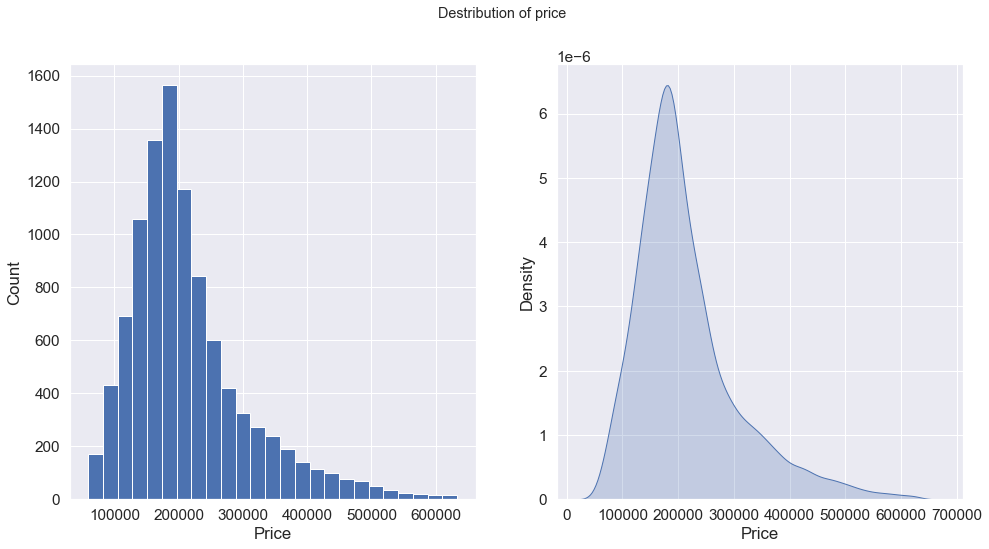

In [1220]:
plt.figure(figsize=(16, 8))

plt.subplot(121)
train_df['Price'].hist(density=False, bins=25)
plt.ylabel('Count')
plt.xlabel('Price')

plt.subplot(122)
sns.kdeplot(train_df['Price'], shade=True, legend=False)
plt.xlabel('Price')

plt.suptitle('Destribution of price')
plt.show()

In [1221]:
target_mean = round(train_df['Price'].mean(), 2)
target_median = train_df['Price'].median()
target_mode = train_df['Price'].mode()[0]

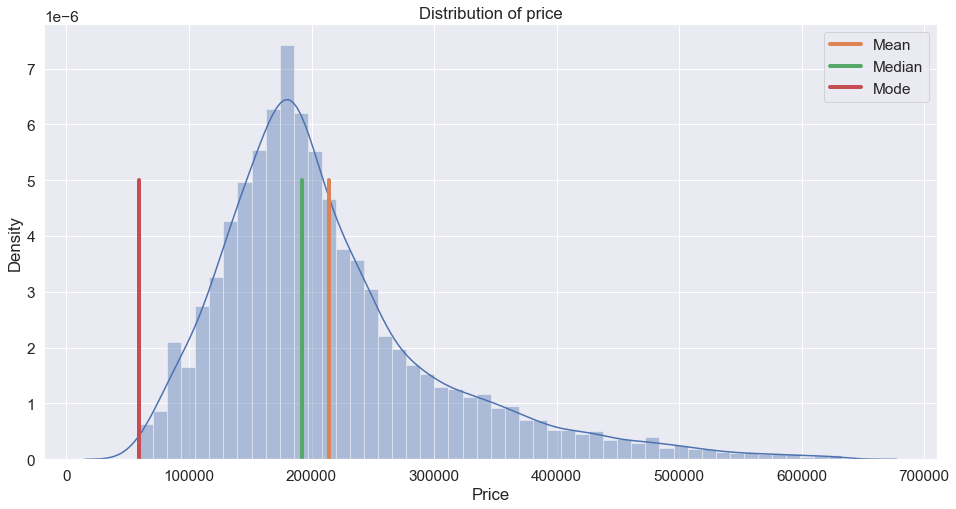

In [1222]:
plt.figure(figsize = (16, 8))

sns.distplot(train_df['Price'], bins=50)

y = np.linspace(0, 0.000005, 10)
plt.plot([target_mean] * 10, y, label='Mean',  linewidth=4)
plt.plot([target_median] * 10, y, label='Median',  linewidth=4)
plt.plot([target_mode] * 10, y, label='Mode', linewidth=4)

plt.title('Distribution of price')
plt.legend()
plt.show()

Странное значение mode. Скорее всего все цены уникальные, mode равна минимальной. Убедимся в этом.

In [1223]:
train_df[train_df['Price'] == target_mode]['Price'] == train_df['Price'].min()

1319    True
Name: Price, dtype: bool

**Поделим цену на интервалы с шагом 10000**

In [1224]:
target_bins = train_df['Price'] // 10000 * 10000

In [1225]:
target_adjusted_mode = target_bins.mode()[0]

print(f"Mode для интервала цены = {target_adjusted_mode}")
print(f"Количество интервалов цены = {len(np.unique(target_bins))}")

Mode для интервала цены = 180000.0
Количество интервалов цены = 59


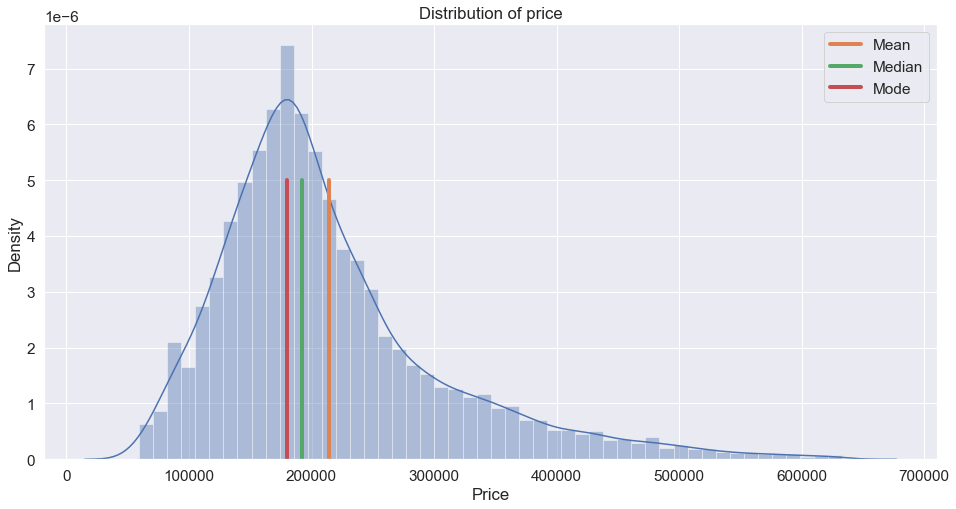

In [1226]:
plt.figure(figsize = (16, 8))

sns.distplot(train_df['Price'], bins=50)

y = np.linspace(0, 0.000005, 10)
plt.plot([target_mean] * 10, y, label='Mean',  linewidth=4)
plt.plot([target_median] * 10, y, label='Median',  linewidth=4)
plt.plot([target_adjusted_mode] * 10, y, label='Mode', linewidth=4)

plt.title('Distribution of price')
plt.legend()
plt.show()

По виду график сильно похож на логнормальное распределение, характерное для финансовых задач. Никаких особых отклонений не наблюдается.

**Можно сделать вывод, что никакой дополнительной опработки целевой переменной не требуется**

## 2. Распределение фичей

Сделаем анализ типов признаков и при необходимости их приведение

In [1227]:
train_df.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

Признаки **Id** и **DistrictId** по своей сути не являются количественными. Преобразуем их строковой тип.

In [1228]:
train_df[['Id', 'DistrictId']] = train_df[['Id', 'DistrictId']].astype(str)

In [1229]:
train_df.dtypes

Id                object
DistrictId        object
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

In [1230]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  object 
 1   DistrictId     10000 non-null  object 
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

Аномалии:
1. пропуски в показателе жилой площади **LifeSquare**;
2. пропуски в показателе местности, связанным с охраной здоровья **Healthcare_1**

In [1231]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,10000.0,1.890500,0.839512,0.000000,1.000000,2.000000,2.000000,1.900000e+01
Square,10000.0,56.315775,21.058732,1.136859,41.774881,52.513310,65.900625,6.410652e+02
LifeSquare,7887.0,37.199645,86.241209,0.370619,22.769832,32.781260,45.128803,7.480592e+03
KitchenSquare,10000.0,6.273300,28.560917,0.000000,1.000000,6.000000,9.000000,2.014000e+03
Floor,10000.0,8.526700,5.241148,1.000000,4.000000,7.000000,12.000000,4.200000e+01
HouseFloor,10000.0,12.609400,6.775974,0.000000,9.000000,13.000000,17.000000,1.170000e+02
HouseYear,10000.0,3990.166300,200500.261427,1910.000000,1974.000000,1977.000000,2001.000000,2.005201e+07
Ecology_1,10000.0,0.118858,0.119025,0.000000,0.017647,0.075424,0.195781,5.218671e-01
Social_1,10000.0,24.687000,17.532614,0.000000,6.000000,25.000000,36.000000,7.400000e+01
Social_2,10000.0,5352.157400,4006.799803,168.000000,1564.000000,5285.000000,7227.000000,1.908300e+04


In [1232]:
train_df['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
6.0        1
19.0       1
Name: Rooms, dtype: int64

Еще аномалии (продолжение 1): 
1. квартиры с нулевым количеством комнат. Скорее всего это вариант реализации пропусков.
2. квартира с 19 комнатами. Скорее всего это выброс.
3. квартиры с нулевым количеством этаже. Скорее всего это вариант реализации пропусков.
4. квартиры в местности с нулевым показателем **Ecology_1**. Возможно это вариант реализации пропусков;
5. квартиры в местности с нулевым показателем **Social_1**. Возможно это вариант реализации пропусков;
6. большое количество квартир в местности с нулевым показателем **Social_3**. 

In [1233]:
train_df[train_df['Square'] < 2]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
4496,15744,34,1.0,1.988943,2.642219,1.0,21,4.0,1977,0.069753,B,B,53,13670,4,NaN,1,11,B,458378.777006
7470,14786,1,1.0,1.136859,4.525736,1.0,3,1.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,181434.825589


In [1234]:
train_df[train_df['Square'] < train_df['LifeSquare']]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
33,847,74,2.0,73.314975,74.131261,1.0,7,6.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,254005.381863
64,3992,1,3.0,87.200625,87.730225,0.0,21,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,300180.365669
77,11771,45,1.0,38.467276,39.624493,1.0,11,9.0,1977,0.195781,B,B,23,5212,6,NaN,3,2,B,247440.530601
100,13343,74,2.0,79.937665,82.931595,1.0,8,21.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,226808.747168
111,13875,20,1.0,28.438794,32.514021,6.0,6,10.0,2014,0.019509,B,B,37,7687,11,176.0,5,5,B,199248.114376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9960,16258,48,3.0,96.056784,98.152802,1.0,15,1.0,2017,0.041125,B,B,46,9515,5,NaN,1,10,B,524365.550705
9962,14175,14,1.0,42.029175,44.682167,10.0,4,4.0,2018,0.238617,B,B,26,3889,6,705.0,3,6,B,87556.385617
9979,2201,6,1.0,40.043234,41.984322,1.0,3,17.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B,134888.083598
9987,11665,1,2.0,62.690057,64.602939,10.0,19,22.0,2018,0.007122,B,B,1,264,0,NaN,0,1,B,203908.192698


In [1235]:
train_df[(train_df['KitchenSquare'] == 0) | (train_df['KitchenSquare'] > 100)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
24,4717,27,1.0,44.203947,NaN,0.0,2,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,135466.559958
38,7679,23,2.0,55.521797,NaN,0.0,3,4.0,1977,0.034656,B,B,0,168,0,NaN,0,0,B,93217.752924
64,3992,1,3.0,87.200625,87.730225,0.0,21,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,300180.365669
88,4439,121,2.0,59.840016,NaN,0.0,22,1.0,1977,0.212515,B,B,19,3293,16,628.0,3,7,B,305673.936207
94,12339,23,1.0,47.485585,NaN,0.0,5,3.0,1977,0.034656,B,B,0,168,0,NaN,0,0,B,126602.673982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9945,3983,6,2.0,63.056315,NaN,0.0,15,17.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,178837.821147
9950,5383,48,3.0,98.994909,NaN,0.0,3,0.0,1977,0.041125,B,B,46,9515,5,NaN,1,10,B,418817.004446
9965,6441,52,3.0,85.796885,85.305246,0.0,15,17.0,1977,0.371149,B,B,34,7065,1,750.0,2,5,B,204462.983720
9991,11173,6,2.0,62.648779,NaN,0.0,6,17.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,182625.548872


Еще аномалии (продолжение 2):
1. есть квартиры с общей площадью **Square** < 2 кв.метра;
2. наличие квартир с общей площадью **Square** < жилой площади **LifeSquare**;
3. наличие квартир с нулевой площадью кухни **KitchenSquare**. Хотя это может быть квартира без отдельной кухни;
4. квартиры с огромной кухней, больше 1000

In [1236]:
train_df['HouseYear'].value_counts()

1977        2652
2017         308
2016         305
2015         299
2014         210
            ... 
1928           1
1947           1
1914           1
4968           1
20052011       1
Name: HouseYear, Length: 97, dtype: int64

Еще аномалии (продолжение 3):
1. в **HouseYear** есть 2 записи с очень большим значением - это 4968 и 20052011. 4968 - это скорее всего 1968, а 20052011 - это период с 2005 по 2011

In [1237]:
train_df[np.isnan(train_df['LifeSquare'])]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
18,4581,1,1.0,47.582480,NaN,1.0,16,16.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,128803.593810
20,8768,63,1.0,50.974891,NaN,1.0,7,16.0,2018,0.238617,B,B,26,3889,6,705.0,3,6,B,260328.413376
24,4717,27,1.0,44.203947,NaN,0.0,2,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,135466.559958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9975,4944,6,2.0,52.573133,NaN,1.0,18,17.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,154366.031184
9978,4851,1,1.0,39.314342,NaN,1.0,13,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,137782.941940
9981,6753,62,2.0,73.092686,NaN,1.0,4,16.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A,159077.198056
9983,647,1,2.0,63.324025,NaN,1.0,4,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,183809.327114


In [1238]:
train_df[np.isnan(train_df['Healthcare_1'])]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962
8,9951,1,1.0,46.887892,44.628132,1.0,12,20.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,160400.401732
11,16755,88,2.0,53.975144,34.153584,8.0,2,12.0,1978,0.127376,B,B,43,8429,3,NaN,3,9,B,253124.005332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,9289,1,3.0,84.486078,88.931509,0.0,4,22.0,2016,0.007122,B,B,1,264,0,NaN,0,1,B,264213.558631
9995,1260,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,B,B,52,10311,6,NaN,1,9,B,119367.455796
9996,16265,27,2.0,64.307684,37.038420,9.0,13,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,199715.148807
9997,2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,B,B,20,4386,14,NaN,1,5,B,165953.912580


In [1239]:
train_df['Helthcare_2'].value_counts()

0    4214
1    2183
3    1670
2    1158
5     388
4     288
6      99
Name: Helthcare_2, dtype: int64

In [1240]:
train_df['Shops_1'].value_counts()

0     2316
1     1325
5     1324
2      964
4      841
3      711
6      487
11     401
9      316
7      294
8      253
23     245
10     215
15     176
16      83
19      49
Name: Shops_1, dtype: int64

Еще аномалии (продолжение 4):
1. есть квартиры со значением NaN в признаке **LifeSquare**;
2. данные со значением NaN в признаке **Healthcare_1**;
3. данные со значением 0 в признаке **Helthcare_2**. Возможно это пропуски;
4. данные со значением 0 в признаке **Shops_1**. Возможно это пропуски.

In [1241]:
train_df['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [1242]:
train_df['Ecology_3'].value_counts()

B    9725
A     275
Name: Ecology_3, dtype: int64

In [1243]:
train_df['Shops_2'].value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

Наблюдения:
1. **Ecology_2** по сути бинарный признак;
2. **Ecology_3** по сути бинарный признак;
3. **Shops_2** по сути бинарный признак.

**Количественные признаки**

In [1244]:
train_df_num_feature = train_df.select_dtypes(include=['float64', 'int64'])
train_df_num_feature.drop('Price', axis=1, inplace=True)

In [1245]:
train_df_num_feature

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
0,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,11,3097,0,NaN,0,0
1,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,30,6207,1,1183.0,1,0
2,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,33,5261,0,240.0,3,1
3,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,1,264,0,NaN,0,1
4,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,33,8667,2,NaN,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,52,10311,6,NaN,1,9
9996,2.0,64.307684,37.038420,9.0,13,0.0,1977,0.072158,2,629,1,NaN,0,0
9997,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,20,4386,14,NaN,1,5
9998,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,47,8004,3,125.0,3,5


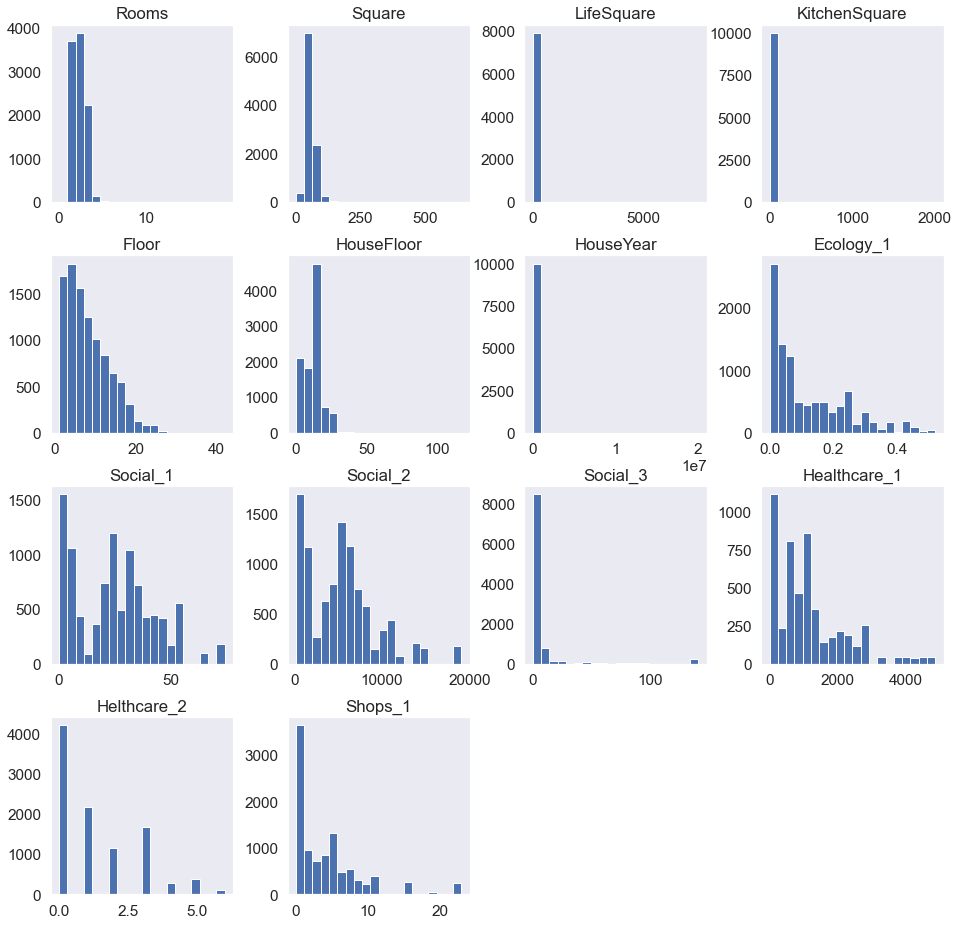

In [1246]:
train_df_num_feature.hist(figsize=(16, 16), bins=20, grid=False)
plt.show()

**Категориальные признаки**

In [1247]:
cat_colnames = train_df.select_dtypes(include='object').columns.tolist()
cat_colnames

['Id', 'DistrictId', 'Ecology_2', 'Ecology_3', 'Shops_2']

In [1248]:
for cat_colname in cat_colnames[2:]:
    print(f"{cat_colname}\n")
    print(f"{train_df[cat_colname].value_counts()}")
    print("-" * 50)

Ecology_2

B    9903
A      97
Name: Ecology_2, dtype: int64
--------------------------------------------------
Ecology_3

B    9725
A     275
Name: Ecology_3, dtype: int64
--------------------------------------------------
Shops_2

B    9175
A     825
Name: Shops_2, dtype: int64
--------------------------------------------------


### Обработка выбросов и пропусков

На предыдущем этапе мы получили следующие аномалии:
1. пропуски в показателе жилой площади **LifeSquare**;
2. пропуски в показателе местности, связанным с охраной здоровья **Healthcare_1**
3. квартиры с нулевым количеством комнат. Скорее всего это вариант реализации пропусков.
4. квартира с 19 комнатами. Скорее всего это выброс.
5. квартиры с нулевым количеством этаже. Скорее всего это вариант реализации пропусков.
6. квартиры в местности с нулевым показателем **Ecology_1**. Возможно это вариант реализации пропусков;
7. квартиры в местности с нулевым показателем **Social_1**. Возможно это вариант реализации пропусков;
8. большое количество квартир в местности с нулевым показателем **Social_3**. 
9. есть квартиры с общей площадью **Square** < 2 кв.метра;
10. наличие квартир с общей площадью **Square** < жилой площади **LifeSquare**;
11. наличие квартир с нулевой площадью кухни **KitchenSquare**. Хотя это может быть квартира без отдельной кухни;
12. квартиры с огромной кухней, больше 1000
13. в **HouseYear** есть 2 записи с очень большим значением - это 4968 и 20052011. 4968 - это скорее всего 1968, а 20052011 - это период с 2005 по 2011
14. есть квартиры со значением NaN в признаке **LifeSquare**;
15. данные со значением NaN в признаке **Healthcare_1**;
16. данные со значением 0 в признаке **Helthcare_2**. Возможно это пропуски;
17. данные со значением 0 в признаке **Shops_1**. Возможно это пропуски.

**Rooms**

Заменим все пропуски на медиану

In [1249]:
train_df['Rooms'].fillna(train_df['Rooms'].median(), inplace=True)

In [1250]:
train_df['Rooms'].value_counts().sort_index()

0.0        8
1.0     3705
2.0     3880
3.0     2235
4.0      150
5.0       18
6.0        1
10.0       2
19.0       1
Name: Rooms, dtype: int64

Маловероятно, что в квартире 10 и более квартир. Заменим все средние количество комнат в квартирах, если их больше 10 или равно 0

In [1251]:
train_df.loc[(train_df['Rooms'] ==0) | (train_df['Rooms'] >= 10), 'Rooms'] = train_df['Rooms'].median()

In [1252]:
train_df['Rooms'].value_counts().sort_index()

1.0    3705
2.0    3891
3.0    2235
4.0     150
5.0      18
6.0       1
Name: Rooms, dtype: int64

**Square**, **LifeSquare**, **KitchenSquare**

Посчитаем сколько процентов составляет нежилая площадь от жилой с учетом количества комнат

In [1253]:
percent_non_life_square = np.round(((train_df['Square'] - train_df['LifeSquare'] - train_df['KitchenSquare']) / train_df['Rooms'] / train_df['Square']).median(), 2)
percent_non_life_square

0.11

In [1254]:
# Заполним пропуски в жилой площади
train_df['LifeSquare'].fillna(train_df['Square'] / (1 + percent_non_life_square) - train_df['KitchenSquare'], inplace=True)

In [1255]:
# Посчитаем средюю площадь жилой комнаты
life_square_by_room = (train_df['LifeSquare'] / train_df['Rooms']).median()
life_square_by_room

19.82994318972345

In [1256]:
# Заменим жилую площадь на среднюю, если она меньше половины медианы или больше 1000
train_df.loc[(train_df['LifeSquare'] < life_square_by_room / 2) | (train_df['LifeSquare'] > 1000), 'LifeSquare'] = life_square_by_room * train_df['Rooms']

In [1257]:
# Заменим площадь кухни на среднюю, если она больше 200
train_df.loc[train_df['KitchenSquare'] > 200, 'KitchenSquare'] = \
    train_df['KitchenSquare'].median()

In [1258]:
# если общая площадь меньше жилой, поменяем их местами
mask = train_df['Square'] < train_df['LifeSquare']
train_df.loc[mask, 'LifeSquare'] = train_df['LifeSquare'] - train_df['Square']
train_df.loc[mask, 'Square'] = train_df['LifeSquare'] + train_df['Square']
train_df.loc[mask, 'LifeSquare'] = train_df['LifeSquare'] - train_df['Square']

In [1259]:
#Скорректируем общую площадь с учетом процента, если она меньше суммы жилой и кухни
train_df.loc[train_df['Square'] < train_df['LifeSquare'] + train_df['KitchenSquare'], 'Square'] = (train_df['LifeSquare'] + train_df['KitchenSquare']) * (1 + percent_non_life_square)


In [1260]:
train_df[train_df['Square'] < train_df['LifeSquare'] + train_df['KitchenSquare']]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


In [1261]:
train_df

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,93.628208,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,35.405322,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1260,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,B,B,52,10311,6,NaN,1,9,B,119367.455796
9996,16265,27,2.0,64.307684,37.038420,9.0,13,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,199715.148807
9997,2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,B,B,20,4386,14,NaN,1,5,B,165953.912580
9998,14561,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,B,B,47,8004,3,125.0,3,5,B,171842.411855


In [1262]:
train_df.loc[train_df['Square'] < train_df['LifeSquare'], {'Square', 'LifeSquare'}]

,LifeSquare,Square


In [1263]:
#Скорректируем площадь кухни, если она меньше 3
train_df.loc[train_df['KitchenSquare'] < 3, 'KitchenSquare'] = 3

**HouseFloor**

In [1264]:
train_df['HouseFloor'].sort_values().unique()

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        36.,  37.,  38.,  39.,  40.,  44.,  45.,  47.,  48.,  99., 117.])

In [1265]:
train_df.loc[train_df['HouseFloor'] == 0, 'HouseFloor'] = int(train_df['HouseFloor'].median())

**Floor**

In [1266]:
train_df['Floor'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33, 37, 42],
      dtype=int64)

In [1267]:
# Возможно были перепутаны этаж и этажность
train_df.loc[train_df['Floor'] > train_df['HouseFloor'], 'Floor'] = train_df['HouseFloor']

**HouseYear**

In [1268]:
train_df.loc[train_df['HouseYear'] > 2021, 'HouseYear'] = train_df['HouseYear'].median()

**Healthcare_1**

In [1269]:
# Посчитаем медиану по Healthcare_1 в разрезе DistrictId, так как скорее всего это ближе 
# к характеритстике района
healthcare_district = train_df.groupby(['DistrictId'], as_index=False).\
agg({'Healthcare_1': 'median'}).rename(columns={'Healthcare_1':'Healthcare_1_median'})
healthcare_district

,DistrictId,Healthcare_1_median
0,0,2857.0
1,1,240.0
2,10,NaN
3,100,770.0
4,101,1548.0
...,...,...
200,95,2300.0
201,96,NaN
202,97,1575.0
203,98,3855.0


In [1270]:
# проставим для отстутсвующих данных медиану в рамках района
train_df.loc[train_df['Healthcare_1'].isna(), 'Healthcare_1'] = \
train_df.merge(healthcare_district, on='DistrictId', how='left')['Healthcare_1_median']

In [1271]:
# если еще остались незаполненные, то проставим медиану по всем районам
train_df.loc[train_df['Healthcare_1'].isna(), 'Healthcare_1'] = train_df['Healthcare_1'].median()

**Матрица корреляций**

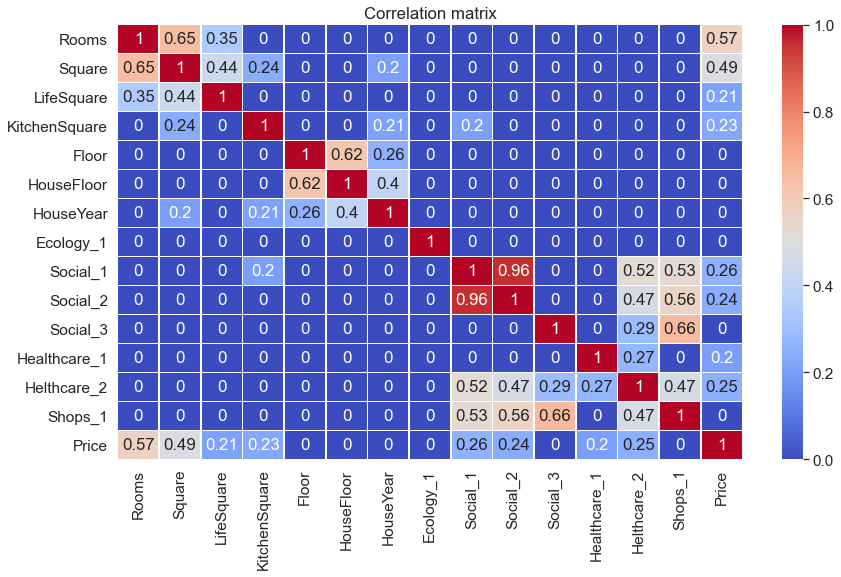

In [1272]:
plt.figure(figsize = (14,8))

sns.set(font_scale=1.4)

corr_matrix = train_df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.2] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

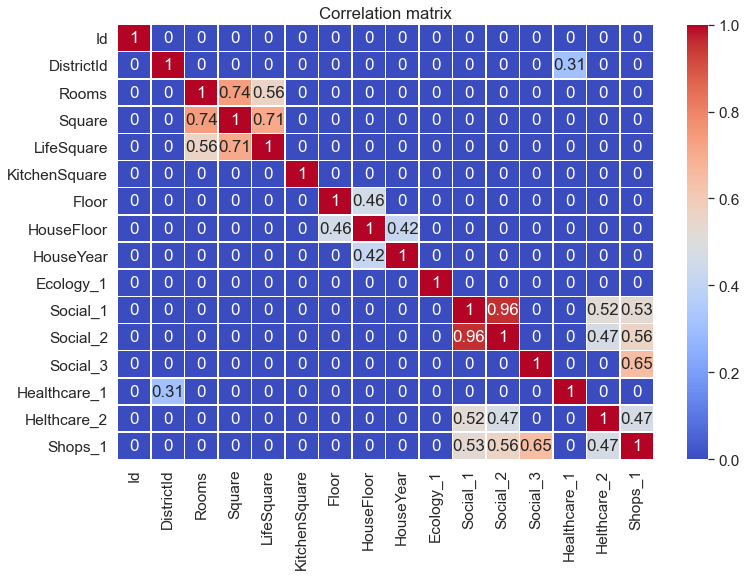

In [1273]:
plt.figure(figsize = (12,8))

sns.set(font_scale=1.4)

corr_matrix = test_df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

### Построение новых признаков

**Dummies**

**Ecology_2, Ecology_3, Shops_2**

In [1274]:
train_df['Ecology_2_bin'] = train_df['Ecology_2'].replace({'A':0, 'B':1})
train_df['Ecology_3_bin'] = train_df['Ecology_3'].replace({'A':0, 'B':1})
train_df['Shops_2_bin'] = train_df['Shops_2'].replace({'A':0, 'B':1})

**Price_per_square** - медианная стоимость квадратного метра в разрезе района

In [1275]:
#train_df = train_df.drop('Price_per_square', axis=1)

In [1276]:
med_price_square_by_district = train_df.groupby(['DistrictId'], as_index=False)\
                                .agg({'Price': 'median', 'Square': 'median'})
med_price_square_by_district['Price_per_square'] = med_price_square_by_district['Price'] / med_price_square_by_district['Square']
train_df['Price_per_square'] = train_df.merge(med_price_square_by_district, on='DistrictId', how='left')['Price_per_square']
train_df

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,Price_per_square
0,11809,27,3.0,115.027311,93.628208,10.0,4.0,10.0,2014,0.075424,...,0,750.0,0,0,B,305018.871089,1,1,1,2583.476734
1,3013,22,1.0,39.832524,23.169223,8.0,7.0,8.0,1966,0.118537,...,1,1183.0,1,0,B,177734.553407,1,1,1,3825.571310
2,8215,1,3.0,78.342215,47.671972,10.0,2.0,17.0,1988,0.025609,...,0,240.0,3,1,B,282078.720850,1,1,1,3010.028543
3,2352,1,1.0,40.409907,35.405322,3.0,10.0,22.0,1977,0.007122,...,0,240.0,0,1,B,168106.007630,1,1,1,3010.028543
4,13866,94,2.0,64.285067,38.562517,9.0,16.0,16.0,1972,0.282798,...,2,750.0,0,6,B,343995.102962,1,1,1,4011.718265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1260,61,2.0,49.090728,33.272626,6.0,3.0,12.0,1981,0.300323,...,6,80.0,1,9,B,119367.455796,1,1,1,4253.754594
9996,16265,27,2.0,64.307684,37.038420,9.0,13.0,13.0,1977,0.072158,...,1,750.0,0,0,A,199715.148807,1,1,0,2583.476734
9997,2795,178,1.0,29.648057,16.555363,5.0,3.0,5.0,1958,0.460556,...,14,628.0,1,5,B,165953.912580,1,1,1,4761.159925
9998,14561,21,1.0,32.330292,22.326870,5.0,3.0,9.0,1969,0.194489,...,3,125.0,3,5,B,171842.411855,1,1,1,3958.272059


In [1277]:
train_df['Price_per_square'].describe()

count    10000.000000
mean      3782.755228
std        991.985017
min       2090.395744
25%       2934.989256
50%       3958.272059
75%       4403.034587
max       8361.390680
Name: Price_per_square, dtype: float64

In [1278]:
tt = np.unique(test_df['DistrictId'])
tt

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 118,
       119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
       132, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145,
       146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 159,
       160, 161, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173,
       175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 18

## 3. Анализ зависимости таргета от фичей

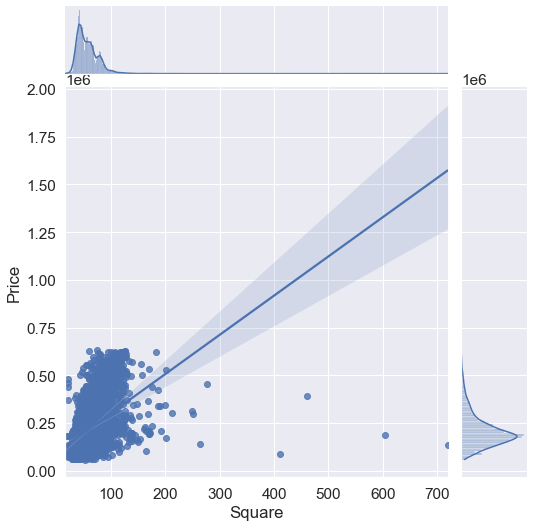

In [1279]:
grid = sns.jointplot(train_df['Square'], train_df['Price'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

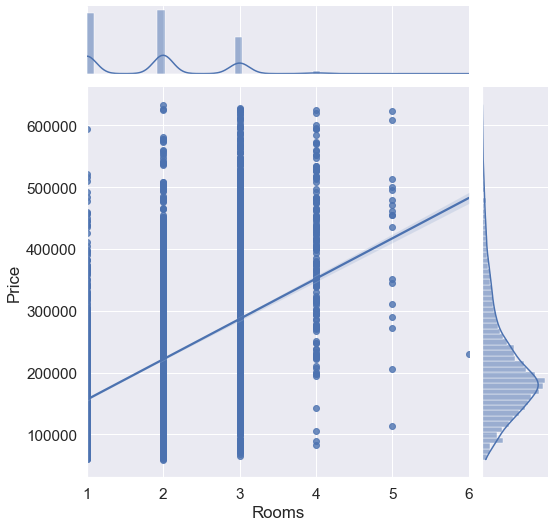

In [1280]:
grid = sns.jointplot(train_df['Rooms'], train_df['Price'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

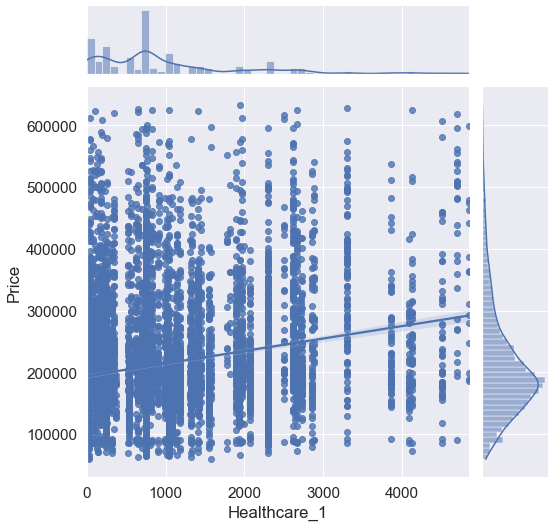

In [1281]:
grid = sns.jointplot(train_df['Healthcare_1'], train_df['Price'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

## 4. Обработка данных

In [1282]:
class DataPipeline:
    """Подготовка исходных данных"""
    
    def __init__(self):
        """Параметры класса"""
        self.medians = None
        self.percent_non_life_square = None # процент нежилой площади от общей
        self.life_square_by_room = None # медианная площадь жилой комнаты
        self.healthcare_district = None # медиану по Healthcare_1 в разрезе DistrictId
        self.med_price_square_by_district = None
        self.med_price_square_by_district_median = None
        self.feature_names = None
        self.target_name = None
        
    def fit(self, df):
        """Сохранение статистик"""
        
        # Расчет медиан
        self.medians = df[['Rooms', 'KitchenSquare', 'HouseFloor', 'HouseYear', 'Healthcare_1']].median()
        self.percent_non_life_square = np.round(((df['Square'] - df['LifeSquare'] - df['KitchenSquare']) / df['Rooms'] / df['Square']).median(), 2)
        self.life_square_by_room = (df['LifeSquare'] / df['Rooms']).median()
        # Посчитаем медиану по Healthcare_1 в разрезе DistrictId
        self.healthcare_district = df.groupby(['DistrictId'], as_index=False).agg({'Healthcare_1': 'median'}).rename(columns={'Healthcare_1':'Healthcare_1_median'})
        # Название признаков и таргета
        self.feature_names = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor',
                         'HouseYear',  'Ecology_1', 'Social_1',  'Social_2', 'Social_3',
                         'Healthcare_1', 'Helthcare_2', 'Shops_1', 
                         'Ecology_2_bin', 'Ecology_3_bin', 'Shops_2_bin', 'Price_per_square']
        self.target_name = 'Price'
        
    def fit_gen(self, df):
        """Сохранение статистикс для генерации новых фич"""
        self.med_price_square_by_district = df.groupby(['DistrictId'], as_index=False)\
                                .agg({'Price': 'median', 'Square': 'median'})
        self.med_price_square_by_district['Price_per_square'] = med_price_square_by_district['Price'] / med_price_square_by_district['Square']
        self.med_price_square_by_district_median = self.med_price_square_by_district['Price_per_square'].median()
        
    def transform(self, df):
        """Трансформация данных"""
              
        # 1. Пропуски
        df['Rooms'].fillna(self.medians['Rooms'], inplace=True)
        df['LifeSquare'].fillna(df['Square'] / (1 + self.percent_non_life_square) - df['KitchenSquare'], inplace=True)
                          
        # 2. Выбросы (outliers)
        df.loc[(df['Rooms'] ==0) | (df['Rooms'] >= 10), 'Rooms'] = self.medians['Rooms']
        
        df.loc[(df['LifeSquare'] < self.life_square_by_room / 2) | (df['LifeSquare'] > 1000), 'LifeSquare'] = self.life_square_by_room * df['Rooms']
        df.loc[df['KitchenSquare'] > 200, 'KitchenSquare'] = self.medians['KitchenSquare']
        # если общая площадь меньше жилой, поменяем их местами
        mask = df['Square'] < df['LifeSquare']
        df.loc[mask, 'LifeSquare'] = df['LifeSquare'] - df['Square']
        df.loc[mask, 'Square'] = df['LifeSquare'] + df['Square']
        df.loc[mask, 'LifeSquare'] = df['LifeSquare'] - df['Square']
        # если общая площадь меньше жилой с кухней 
        df.loc[df['Square'] < df['LifeSquare'] + df['KitchenSquare'], 'Square'] = (df['LifeSquare'] + df['KitchenSquare']) * (1 + self.percent_non_life_square)
        df.loc[df['KitchenSquare'] < 3, 'KitchenSquare'] = 3
        
        df.loc[df['HouseFloor'] == 0, 'HouseFloor'] = int(self.medians['HouseFloor'])
        df.loc[df['Floor'] > df['HouseFloor'], 'Floor'] = df['HouseFloor']
        
        df.loc[df['HouseYear'] > 2021, 'HouseYear'] = self.medians['HouseYear']
        
        # проставим для отстутсвующих данных медиану в рамках района
        df.loc[df['Healthcare_1'].isna(), 'Healthcare_1'] = df.merge(self.healthcare_district, on='DistrictId', how='left')['Healthcare_1_median']
        
        # если еще остались незаполненные, то проставим медиану по всем районам
        df.loc[df['Healthcare_1'].isna(), 'Healthcare_1'] = self.medians['Healthcare_1']
        
         # 3. Изменение типа данных
        df[['Id', 'DistrictId']] = df[['Id', 'DistrictId']].astype(str);
        
        return df
    
    def fit_transform(self, df):
        self.fit(df)
        return self.transform(df)
        
    def features_gen(self, df):
        """Генерация новых фич"""
       
        # Dummies
        df['Ecology_2_bin'] = df['Ecology_2'].replace({'A':0, 'B':1})
        df['Ecology_3_bin'] = df['Ecology_3'].replace({'A':0, 'B':1})
        df['Shops_2_bin'] = df['Shops_2'].replace({'A':0, 'B':1})
        
        # Медианная стоимоть квадратного метра в разрезе района
        df['Price_per_square'] = df.merge(self.med_price_square_by_district, on='DistrictId', how='left')['Price_per_square']
        df.loc[df['Price_per_square'].isna(), 'Price_per_square'] = self.med_price_square_by_district_median
        
        return df

    def features_drop(self, df):
        """Удалим признаки, которые не нужны для модели"""    
        df = df[feature_names + [target_name]]
        
        return df

    def features_drop_without_target(self, df):
        """Удалим признаки, которые не нужны для модели"""    
        df = df[feature_names]
        
        return df



In [1283]:
train_df = pd.read_csv(TRAIN_DATASET, sep=',')
test_df = pd.read_csv(TEST_DATASET, sep=',')
predict_df = pd.DataFrame(test_df['Id'], columns={'Id'})

In [1284]:
pipe_line = DataPipeline()

train_df = pipe_line.fit_transform(train_df)
test_df = pipe_line.transform(test_df)

pipe_line.fit_gen(train_df)
train_df = pipe_line.features_gen(train_df)
test_df = pipe_line.features_gen(test_df)

train_df = pipe_line.features_drop(train_df)
test_df = pipe_line.features_drop_without_target(test_df)

## 5. Разбиение на train / test

In [1285]:
feature_names = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor',
                         'HouseYear',  'Ecology_1', 'Social_1',  'Social_2', 'Social_3',
                         'Healthcare_1', 'Helthcare_2', 'Shops_1', 
                         'Ecology_2_bin', 'Ecology_3_bin', 'Shops_2_bin', 'Price_per_square']
target_name = 'Price'

In [1286]:
X = train_df[feature_names]
y = train_df[target_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, shuffle=True, random_state=42)

## 6. Построение модели

In [1287]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    """Оценка качества модели и график preds vs true"""
    
    print(f"Тренировочный R2:\t{str(round(r2(train_true_values, train_pred_values), 3))}")
    print(f"  Проверочный R2:\t{str(round(r2(test_true_values, test_pred_values), 3))}")
    
    plt.figure(figsize=(16,8))
    
    plt.subplot(121)
    sns.scatterplot(x=train_true_values, y=train_pred_values)
    plt.plot([0, 500000], [0, 500000], linestyle='--', color='black')  # диагональ, где true_values = pred_values
    plt.xlabel('Предсказанные значения')
    plt.ylabel('Истинные значения')
    plt.title('Тренировочные предсказания')
    
    plt.subplot(122)
    sns.scatterplot(x=test_true_values, y=test_pred_values)
    plt.plot([0, 500000], [0, 500000], linestyle='--', color='black')  # диагональ, где true_values = pred_values
    plt.xlabel('Предсказанные значения')
    plt.ylabel('Истинные значения')
    plt.title('Проверочные предсказания')
    
    plt.show()

In [1288]:
# Построение модели для оптимального подбора параметров
# gbr_model = GradientBoostingRegressor(criterion='mse',
#                           min_samples_leaf=10,
#                           random_state=13)

In [1289]:
# Подбор оптимальных параметров
# %%time
# params = {'n_estimators':[50, 100, 150, 200, 400], 
#           'max_depth':[3, 5, 6, 7, 8, 10]}

# gscv = GridSearchCV(gbr_model, params, 
#                   scoring='r2', # метрика 
#                   cv=KFold(n_splits=5,   # k (кол-во разбиений/итераций) в кросс-валидации
#                            random_state=13, 
#                            shuffle=True),
#                   n_jobs=-1
#                   )
# gscv.fit(X_train, y_train)

In [1290]:
#gscv.best_params_

In [1291]:
#gscv.best_score_

In [1292]:
# Построение финальной модели с оптимальными параметрами {'max_depth': 5, 'n_estimators': 100}
final_model = GradientBoostingRegressor(criterion='mse',
                                        max_depth=5,
                                        min_samples_leaf=10,
                                        random_state=13,
                                        n_estimators=100)

final_model.fit(X_train, y_train)

GradientBoostingRegressor(criterion='mse', max_depth=5, min_samples_leaf=10,
                          random_state=13)

Тренировочный R2:	0.852
  Проверочный R2:	0.74


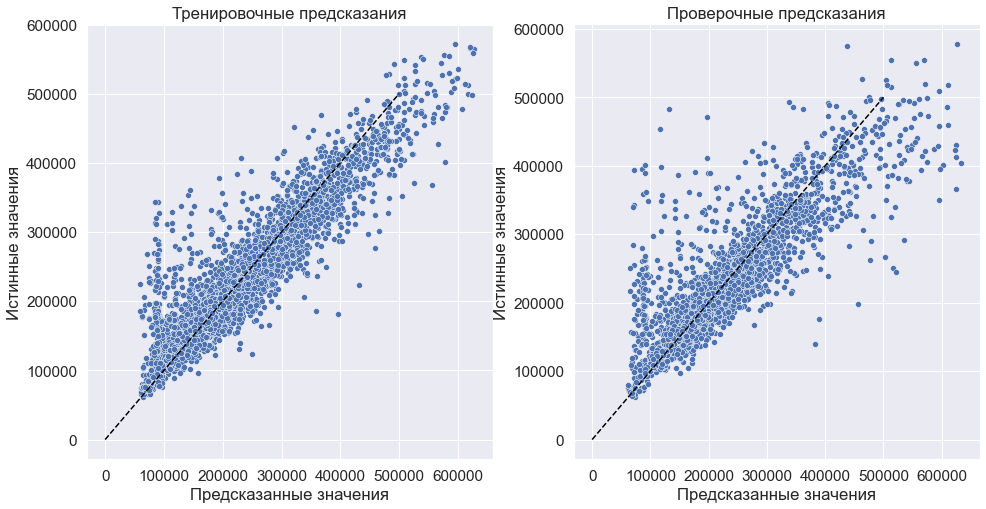

In [1293]:
# Предсказание
y_train_preds = final_model.predict(X_train)
y_test_preds = final_model.predict(X_test)


evaluate_preds(y_train, y_train_preds, y_test, y_test_preds)

**Перекрёстная проверка**

In [1294]:
cv_score = cross_val_score(
    final_model,
    X.fillna(-9999),
    y, scoring='r2',
    cv=KFold(n_splits=5, shuffle=True, random_state=21)
)
cv_score

array([0.76761617, 0.74691409, 0.73284278, 0.75845187, 0.76673169])

In [1295]:
cv_score.mean(), cv_score.std()

(0.754511320766633, 0.01314417195590682)

In [1296]:
cv_score.mean() - cv_score.std(), cv_score.mean() + cv_score.std()

(0.7413671488107262, 0.7676554927225397)

**Важность признаков**

In [1297]:
final_model.feature_importances_

array([3.56512421e-02, 4.21367887e-01, 1.38645329e-02, 1.92985026e-02,
       7.22984921e-03, 1.33339590e-02, 2.56552685e-02, 8.74508080e-03,
       1.18805366e-02, 1.20303475e-02, 1.61829820e-02, 1.05593940e-02,
       1.88132147e-03, 3.36782763e-03, 0.00000000e+00, 6.11734266e-05,
       4.00170005e-04, 3.98489925e-01])

In [1298]:
feature_importances = pd.DataFrame(zip(X_train.columns, 
                                       final_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False, inplace=True)

In [1299]:
feature_importances

,feature_name,importance
1,Square,0.421368
17,Price_per_square,0.398490
0,Rooms,0.035651
6,HouseYear,0.025655
3,KitchenSquare,0.019299
10,Social_3,0.016183
2,LifeSquare,0.013865
5,HouseFloor,0.013334
9,Social_2,0.012030
8,Social_1,0.011881


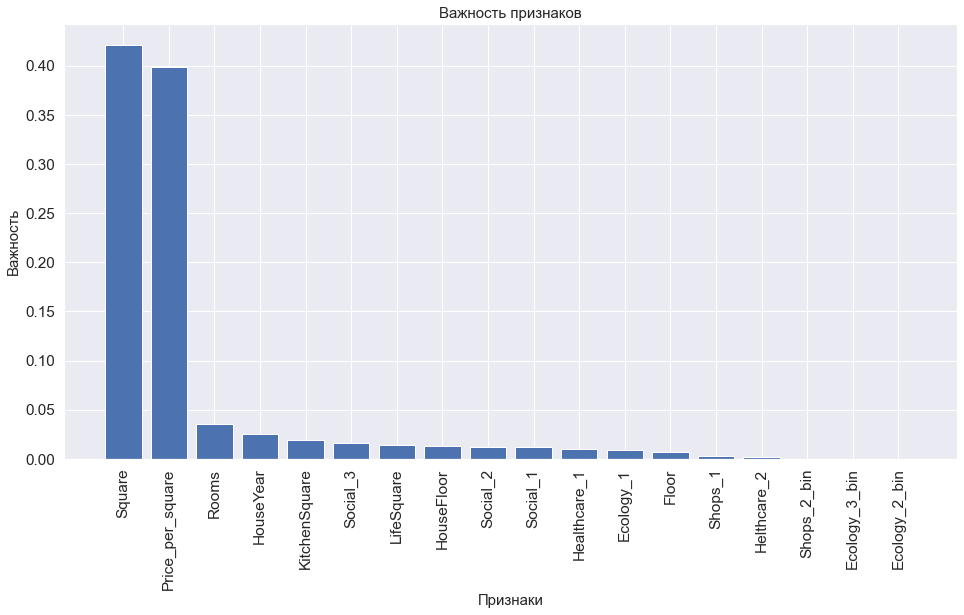

In [1300]:
plt.figure(figsize = (16, 8))
plt.bar(feature_importances['feature_name'], feature_importances['importance'])
plt.xticks(rotation='90')
plt.xlabel('Признаки', fontsize=15)
plt.ylabel('Важность', fontsize=15)
plt.title('Важность признаков', fontsize=15)
plt.show()

## 7. Формирование файла с прогнозами

In [1301]:
# Предсказание для тестовой выборки
test_predict_df = final_model.predict(test_df)
predict_df['Price'] = test_predict_df

# Проверка
assert predict_df.shape[0] == 5000, f"Real pred-shape = {predict_df.shape[0]}, Expected pred-shape = 5000"

#Сохранение в файл
prediction_file_name = './VSokolov_predictions.csv'
predict_df.to_csv(prediction_file_name, index=False)

In [1302]:
predict_df

,Id,Price
0,4567,174729.028773
1,5925,124141.812574
2,960,153933.267076
3,3848,114603.919953
4,746,166566.299869
...,...,...
4995,10379,176528.478071
4996,16138,370910.869099
4997,3912,149140.396460
4998,5722,190287.557370


**Проверим, что предсказания успешно сохранено**

In [1303]:
check_predict_df = pd.read_csv(prediction_file_name)
check_predict_df.head(n=2)

,Id,Price
0,4567,174729.028773
1,5925,124141.812574


In [1304]:
check_predict_df.tail(n=2)

,Id,Price
4998,5722,190287.557370
4999,11004,287358.370007


In [1305]:
check_predict_df.shape

(5000, 2)